In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../')
import utils
import calibration_utils as calibration
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import numpy as np

In [3]:
OLD_CALIBRATION_FILE = '../input/N_matrix_trial9.mat'
CALIBRATION_FILE = '../calibration/out/cal_1_C_matrix.mat'
MEASUREMENT_ROOT = './measurement_files/'
MEASUREMENT = "cal_3"
NANO_FILE = MEASUREMENT_ROOT + MEASUREMENT + ".csv"
TELEMETRY_FILE = MEASUREMENT_ROOT + MEASUREMENT + "_telemetry.txt"

In [4]:
nano_df = calibration.nanofile_to_dataframe(NANO_FILE)
telem_df = calibration.telemetry_to_dataframe(TELEMETRY_FILE)

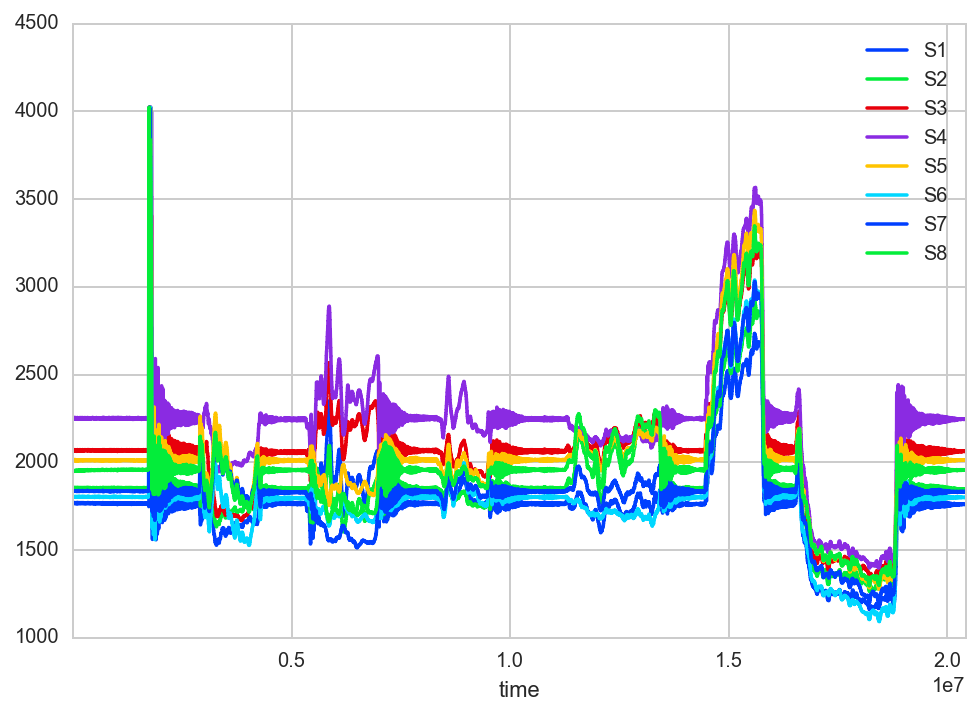

In [6]:
# applied
telem_df.plot(x="time")

In [4]:
print "nano_df shape " + str(nano_df.shape)
print "telem_df shape " + str(telem_df.shape)

nano_df shape (278000, 7)
telem_df shape (20393, 9)


In [5]:
nano_df.head()

,time,Fx,Fy,Fz,Mx,My,Mz
0,0.0000,-0.002738,0.000364,-0.003175,-0.008904,-0.010529,0.000226
1,0.0001,-0.002735,0.000369,-0.003144,-0.009631,-0.010509,-0.000222
2,0.0002,-0.002731,0.000374,-0.003111,-0.010352,-0.010480,-0.000674
3,0.0003,-0.002726,0.000378,-0.003077,-0.011068,-0.010439,-0.001129
4,0.0004,-0.002721,0.000382,-0.003042,-0.011779,-0.010388,-0.001585


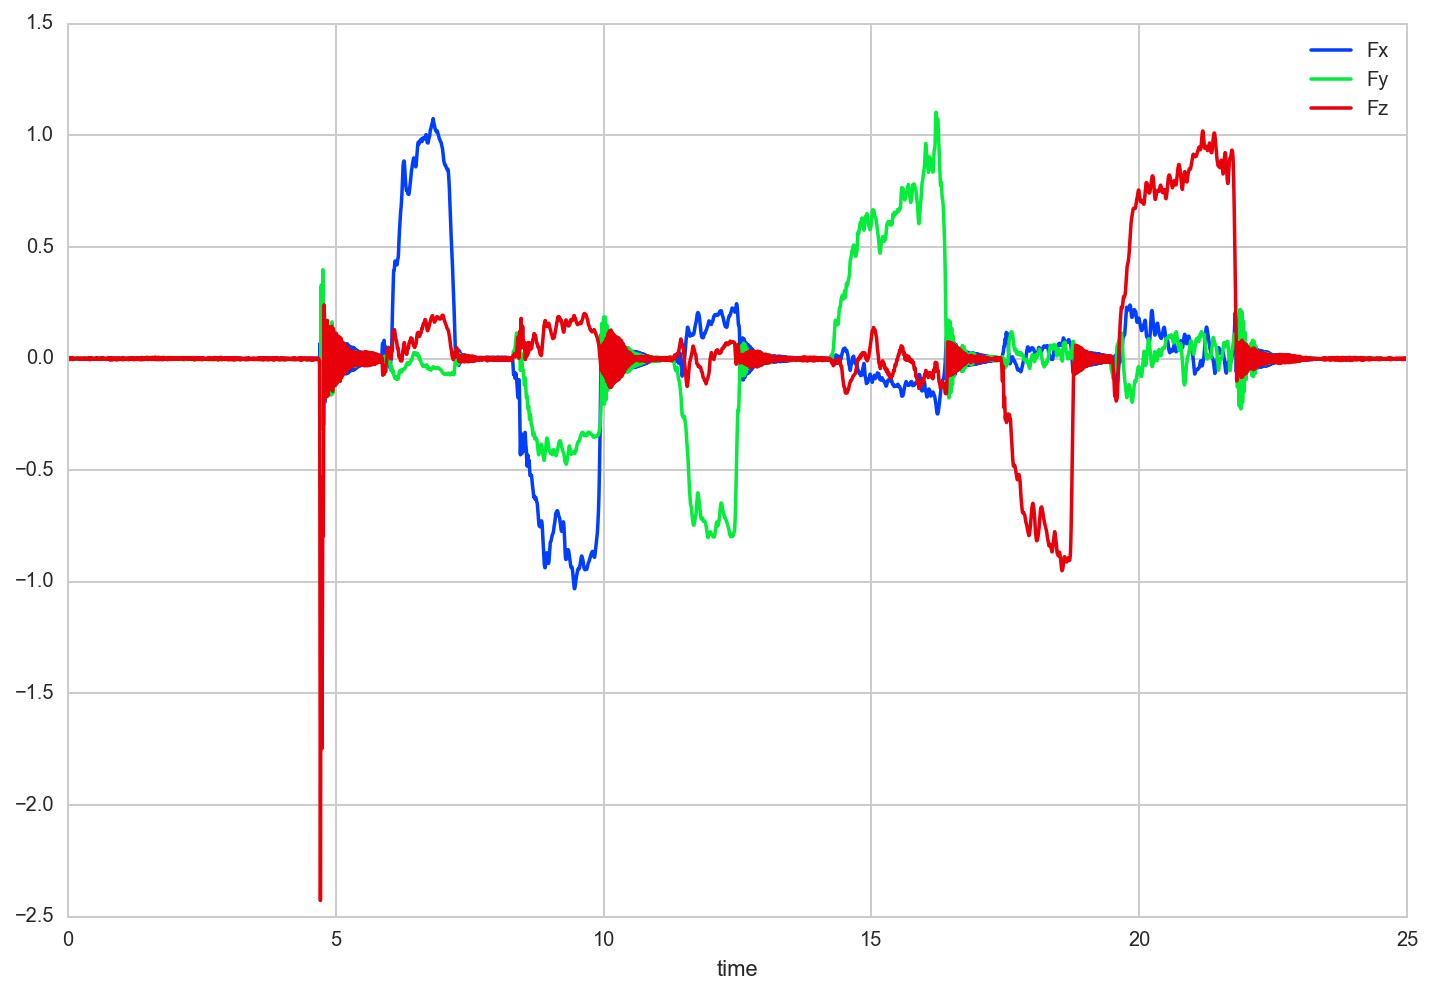

In [6]:
nano_df.plot(x="time", y=["Fx", "Fy", "Fz"], xlim=(0, 25), figsize=(12,8))
plt.show()

In [7]:
nano_np = calibration.downsample_with_frequency(nano_df, 10, 1)

In [8]:
nano_np.shape

(27800, 6)

In [9]:
U, s, V = np.linalg.svd(nano_np, full_matrices=True)

In [10]:
s

array([ 1766.41905947,  1274.60687968,   916.06451665,    43.05510741,
           9.89930749,     5.70521582])

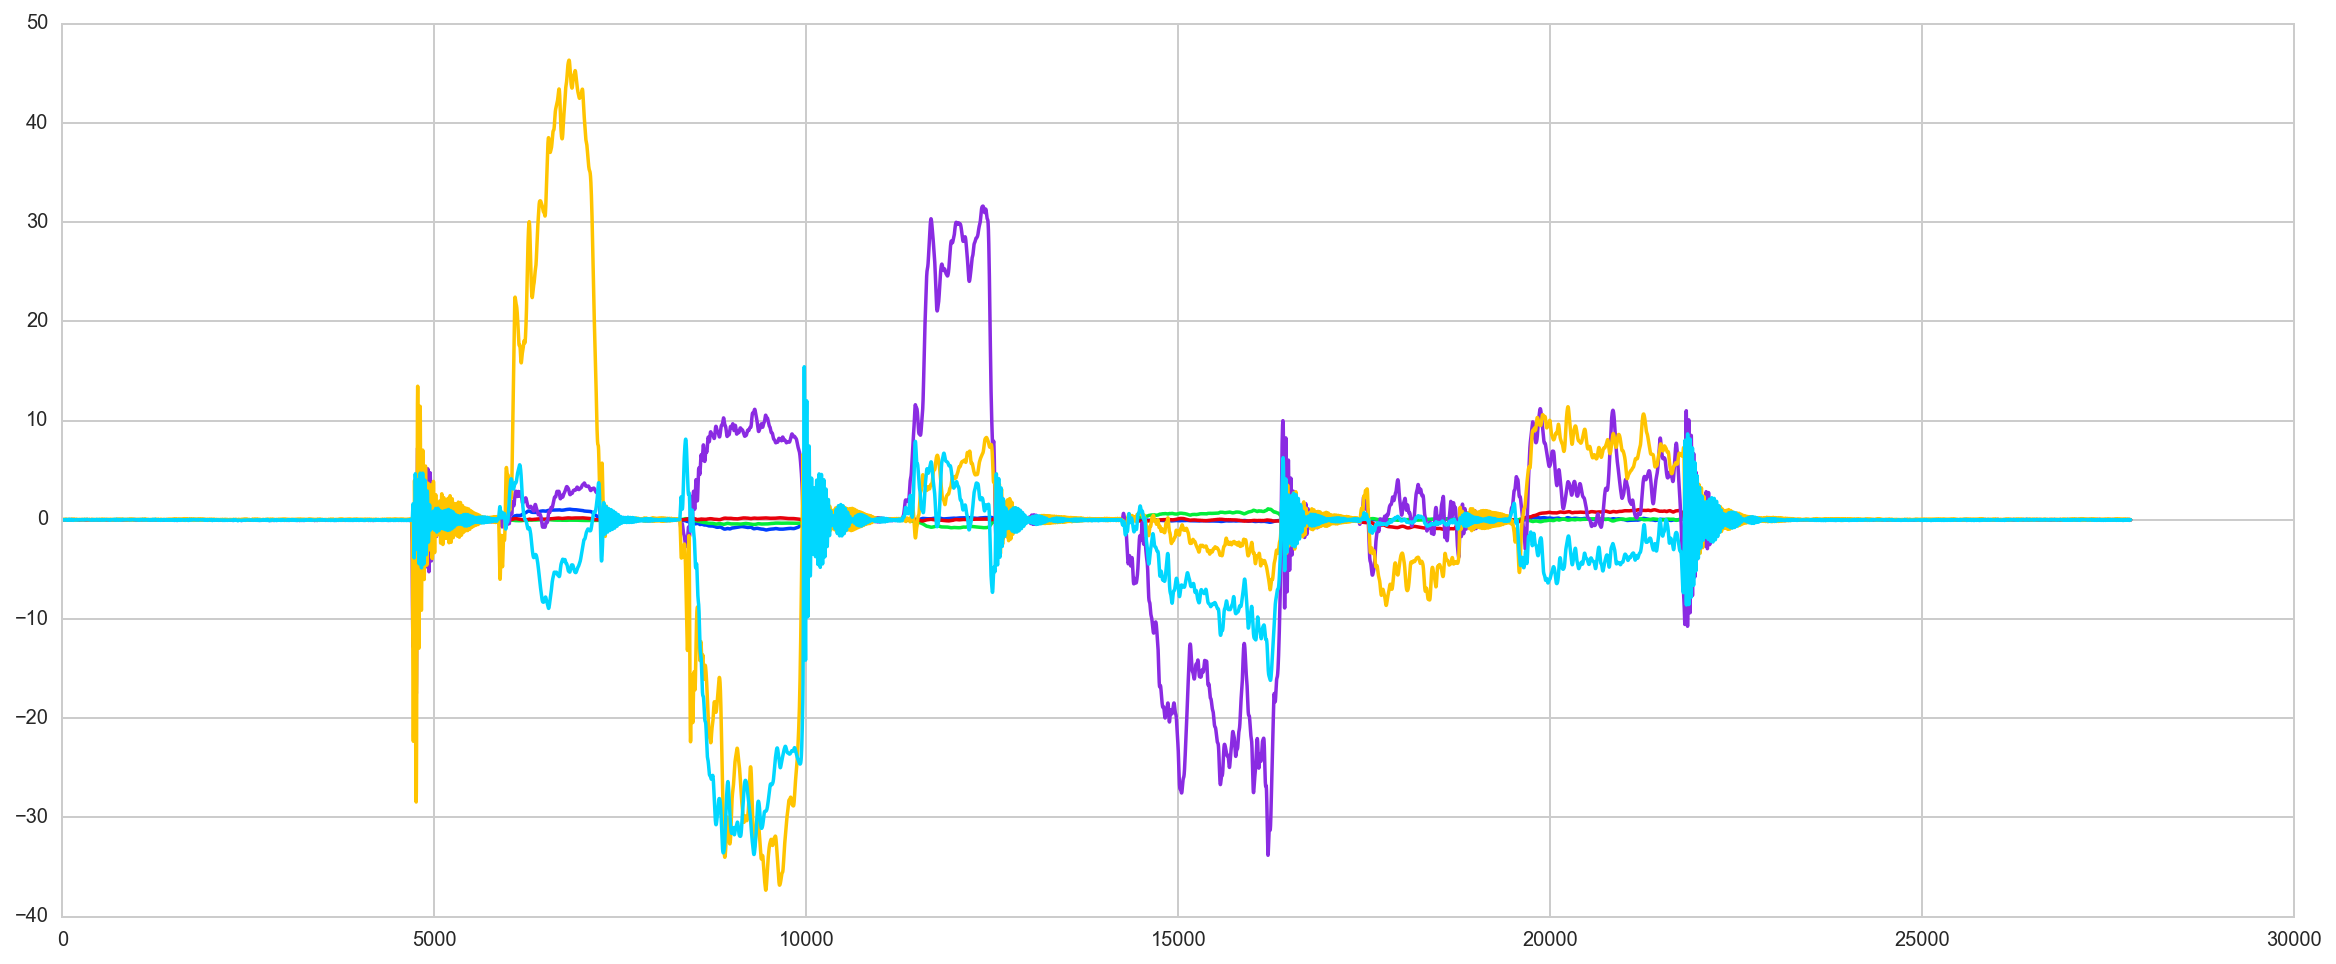

In [11]:
plt.figure(figsize=(20,8))
for i in range(6):
    plt.plot(xrange(nano_np.shape[0]), nano_np[:,i])    
plt.show()

In [1]:
telem_df.plot()

NameError: name 'telem_df' is not defined